In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import xlrd

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Skripsi Abdul Hakim/piton skripsi

Mounted at /content/drive
/content/drive/MyDrive/Skripsi Abdul Hakim/piton skripsi


In [ ]:
location = "Cinta Jaya 1"
df = pd.read_pickle("anomaly/" + location + ".pkl")
df

,location,date,rain,soil,gwl,temp,anomaly
0,Cinta Jaya 1,2018-11-10 11:40:00,0.4,3.2,NaN,30.7,1
1,Cinta Jaya 1,2018-11-10 11:50:00,0.0,3.2,NaN,30.7,1
2,Cinta Jaya 1,2018-11-10 12:00:00,0.0,3.2,NaN,30.7,1
3,Cinta Jaya 1,2018-11-10 12:10:00,0.0,3.2,NaN,31.1,1
4,Cinta Jaya 1,2018-11-10 12:20:00,0.0,3.2,NaN,31.1,1
...,...,...,...,...,...,...,...
53319,Cinta Jaya 1,2020-01-10 02:00:00,0.0,29.0,-0.876,29.5,0
53320,Cinta Jaya 1,2020-01-10 02:10:00,0.0,29.0,-0.886,29.5,0
53321,Cinta Jaya 1,2020-01-10 02:20:00,0.0,29.0,-0.881,29.5,0
53322,Cinta Jaya 1,2020-01-10 02:30:00,0.0,28.6,-0.878,29.5,0


In [ ]:
df = df.drop(['anomaly', 'location'], axis=1)
df

,date,rain,soil,gwl,temp
0,2018-11-10 11:40:00,0.4,3.2,NaN,30.7
1,2018-11-10 11:50:00,0.0,3.2,NaN,30.7
2,2018-11-10 12:00:00,0.0,3.2,NaN,30.7
3,2018-11-10 12:10:00,0.0,3.2,NaN,31.1
4,2018-11-10 12:20:00,0.0,3.2,NaN,31.1
...,...,...,...,...,...
53319,2020-01-10 02:00:00,0.0,29.0,-0.876,29.5
53320,2020-01-10 02:10:00,0.0,29.0,-0.886,29.5
53321,2020-01-10 02:20:00,0.0,29.0,-0.881,29.5
53322,2020-01-10 02:30:00,0.0,28.6,-0.878,29.5


In [ ]:
df = df.set_index('date')
df

,rain,soil,gwl,temp
date,,,,
2018-11-10 11:40:00,0.4,3.2,NaN,30.7
2018-11-10 11:50:00,0.0,3.2,NaN,30.7
2018-11-10 12:00:00,0.0,3.2,NaN,30.7
2018-11-10 12:10:00,0.0,3.2,NaN,31.1
2018-11-10 12:20:00,0.0,3.2,NaN,31.1
...,...,...,...,...
2020-01-10 02:00:00,0.0,29.0,-0.876,29.5
2020-01-10 02:10:00,0.0,29.0,-0.886,29.5
2020-01-10 02:20:00,0.0,29.0,-0.881,29.5


In [ ]:
df = df.asfreq('10T')
df

,rain,soil,gwl,temp
date,,,,
2018-11-10 11:40:00,0.4,3.2,NaN,30.7
2018-11-10 11:50:00,0.0,3.2,NaN,30.7
2018-11-10 12:00:00,0.0,3.2,NaN,30.7
2018-11-10 12:10:00,0.0,3.2,NaN,31.1
2018-11-10 12:20:00,0.0,3.2,NaN,31.1
...,...,...,...,...
2020-01-10 02:00:00,0.0,29.0,-0.876,29.5
2020-01-10 02:10:00,0.0,29.0,-0.886,29.5
2020-01-10 02:20:00,0.0,29.0,-0.881,29.5


In [ ]:
from sklearn.impute import KNNImputer

impute = KNNImputer(n_neighbors=5)
knn_impute = impute.fit_transform(df)

knn = pd.DataFrame(knn_impute, columns=['rain', 'soil', 'gwl', 'temp'], index=df.index)
knn

KeyboardInterrupt: ignored

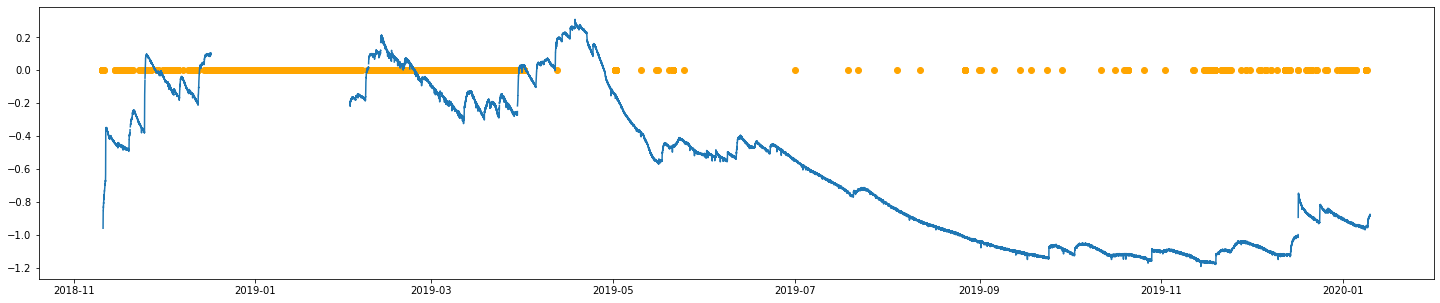

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(df['gwl'])
plt.scatter(df[df['gwl'].isnull()].index, [0]*8200, color='orange')

In [ ]:
df['gwl'].isnull().sum()

8200

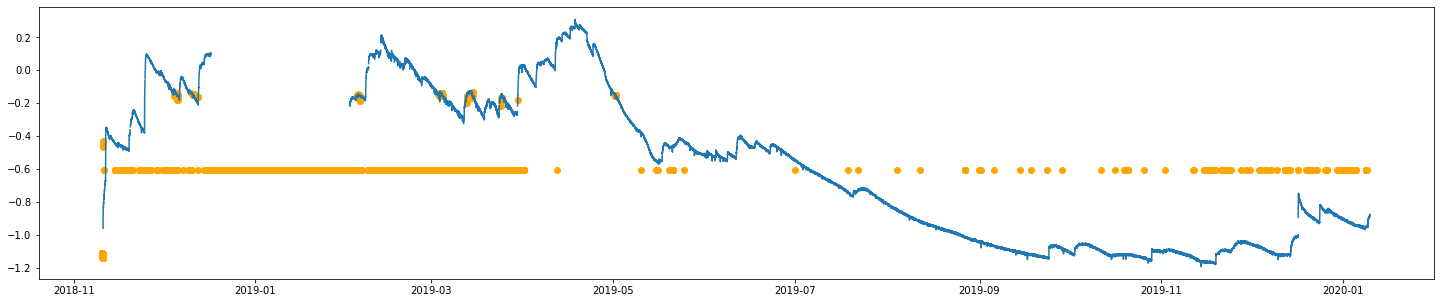

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(df['gwl'])
plt.scatter(df[df['gwl'].isnull()].index, knn.loc[df[df['gwl'].isnull()].index]['gwl'], color='orange')

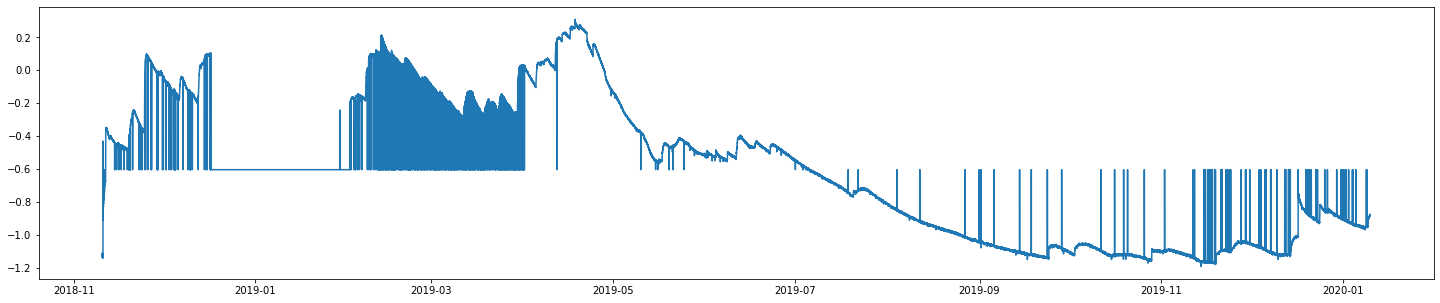

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(knn['gwl'])

In [ ]:
locf = df.ffill()
locf = df.bfill()
locf.isna().sum()

rain    0
soil    0
gwl     0
temp    0
dtype: int64

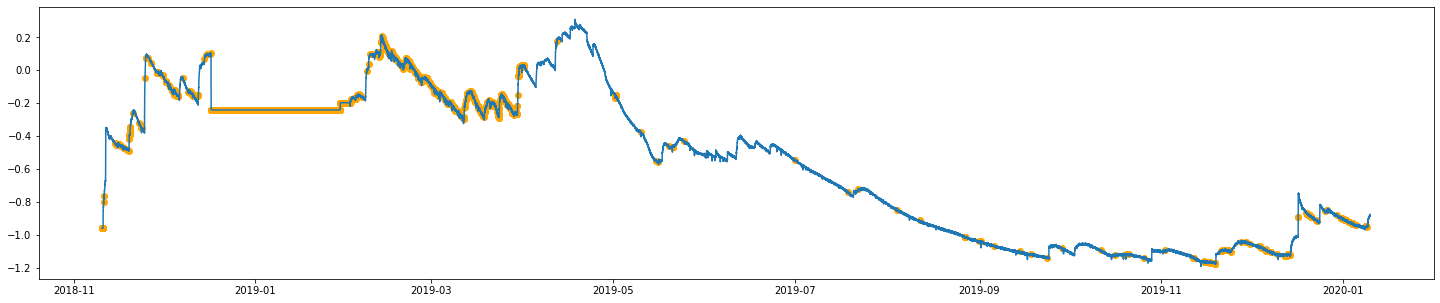

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(locf['gwl'])
plt.scatter(df[df['gwl'].isnull()].index, locf.loc[df[df['gwl'].isnull()].index]['gwl'], color='orange')

In [ ]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [ ]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
dataset = locf
dataset

,rain,soil,gwl,temp
date,,,,
2018-11-10 11:40:00,0.4,3.2,-0.959,30.7
2018-11-10 11:50:00,0.0,3.2,-0.959,30.7
2018-11-10 12:00:00,0.0,3.2,-0.959,30.7
2018-11-10 12:10:00,0.0,3.2,-0.959,31.1
2018-11-10 12:20:00,0.0,3.2,-0.959,31.1
...,...,...,...,...
2020-01-10 02:00:00,0.0,29.0,-0.876,29.5
2020-01-10 02:10:00,0.0,29.0,-0.886,29.5
2020-01-10 02:20:00,0.0,29.0,-0.881,29.5


In [ ]:
dataset = dataset[['gwl', 'rain', 'soil', 'temp']]
dataset

,gwl,rain,soil,temp
date,,,,
2018-11-10 11:40:00,-0.959,0.4,3.2,30.7
2018-11-10 11:50:00,-0.959,0.0,3.2,30.7
2018-11-10 12:00:00,-0.959,0.0,3.2,30.7
2018-11-10 12:10:00,-0.959,0.0,3.2,31.1
2018-11-10 12:20:00,-0.959,0.0,3.2,31.1
...,...,...,...,...
2020-01-10 02:00:00,-0.876,0.0,29.0,29.5
2020-01-10 02:10:00,-0.886,0.0,29.0,29.5
2020-01-10 02:20:00,-0.881,0.0,29.0,29.5


In [ ]:
values = dataset.values

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
scaled

array([[0.15466667, 0.00227531, 0.03459459, 0.89766082],
       [0.15466667, 0.        , 0.03459459, 0.89766082],
       [0.15466667, 0.        , 0.03459459, 0.89766082],
       ...,
       [0.20666667, 0.        , 0.31351351, 0.8625731 ],
       [0.20866667, 0.        , 0.30918919, 0.8625731 ],
       [0.21      , 0.        , 0.31351351, 0.8625731 ]])

In [ ]:
reframed = series_to_supervised(scaled, 1, 1)
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t),var2(t),var3(t),var4(t)
1,0.154667,0.002275,0.034595,0.897661,0.154667,0.0,0.034595,0.897661
2,0.154667,0.000000,0.034595,0.897661,0.154667,0.0,0.034595,0.897661
3,0.154667,0.000000,0.034595,0.897661,0.154667,0.0,0.034595,0.909357
4,0.154667,0.000000,0.034595,0.909357,0.154667,0.0,0.034595,0.909357
5,0.154667,0.000000,0.034595,0.909357,0.154667,0.0,0.034595,0.909357
...,...,...,...,...,...,...,...,...
61286,0.208667,0.000000,0.313514,0.862573,0.210000,0.0,0.313514,0.862573
61287,0.210000,0.000000,0.313514,0.862573,0.203333,0.0,0.313514,0.862573
61288,0.203333,0.000000,0.313514,0.862573,0.206667,0.0,0.313514,0.862573
61289,0.206667,0.000000,0.313514,0.862573,0.208667,0.0,0.309189,0.862573


In [ ]:
reframed = reframed.iloc[:, :-3]
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t)
1,0.154667,0.002275,0.034595,0.897661,0.154667
2,0.154667,0.000000,0.034595,0.897661,0.154667
3,0.154667,0.000000,0.034595,0.897661,0.154667
4,0.154667,0.000000,0.034595,0.909357,0.154667
5,0.154667,0.000000,0.034595,0.909357,0.154667
...,...,...,...,...,...
61286,0.208667,0.000000,0.313514,0.862573,0.210000
61287,0.210000,0.000000,0.313514,0.862573,0.203333
61288,0.203333,0.000000,0.313514,0.862573,0.206667
61289,0.206667,0.000000,0.313514,0.862573,0.208667


In [ ]:
n_train = int(61290 * 0.8)

values = reframed.values

In [ ]:
train = values[:n_train, :]
test  = values[n_train:, :]

In [ ]:
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [ ]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(49032, 1, 4) (49032,) (12258, 1, 4) (12258,)


In [ ]:
train_X.shape[1]

1

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
# model.add(LSTM(10, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(100))
model.compile(optimizer='adam', loss='mae')


# model.compile(loss='mae', optimizer='adam')

In [ ]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50
681/681 - 5s - loss: 0.0427 - val_loss: 0.0476 - 5s/epoch - 7ms/step
Epoch 2/50
681/681 - 2s - loss: 0.0408 - val_loss: 0.0409 - 2s/epoch - 4ms/step
Epoch 3/50
681/681 - 3s - loss: 0.0349 - val_loss: 0.0365 - 3s/epoch - 4ms/step
Epoch 4/50
681/681 - 2s - loss: 0.0283 - val_loss: 0.0324 - 2s/epoch - 3ms/step
Epoch 5/50
681/681 - 2s - loss: 0.0233 - val_loss: 0.0304 - 2s/epoch - 3ms/step
Epoch 6/50
681/681 - 2s - loss: 0.0190 - val_loss: 0.0248 - 2s/epoch - 3ms/step
Epoch 7/50
681/681 - 2s - loss: 0.0164 - val_loss: 0.0219 - 2s/epoch - 3ms/step
Epoch 8/50
681/681 - 4s - loss: 0.0150 - val_loss: 0.0208 - 4s/epoch - 6ms/step
Epoch 9/50
681/681 - 2s - loss: 0.0139 - val_loss: 0.0189 - 2s/epoch - 3ms/step
Epoch 10/50
681/681 - 2s - loss: 0.0127 - val_loss: 0.0193 - 2s/epoch - 3ms/step
Epoch 11/50
681/681 - 2s - loss: 0.0117 - val_loss: 0.0187 - 2s/epoch - 3ms/step
Epoch 12/50
681/681 - 2s - loss: 0.0110 - val_loss: 0.0166 - 2s/epoch - 3ms/step
Epoch 13/50
681/681 - 2s - loss: 0.01

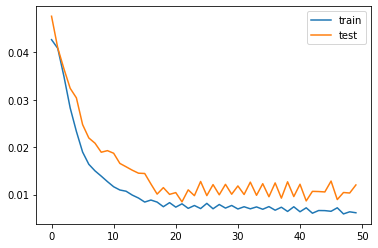

In [ ]:
from matplotlib import pyplot
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
from math import sqrt
from numpy import concatenate

In [ ]:
# # make a prediction
# yhat = model.predict(test_X)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# # invert scaling for forecast
# inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# # invert scaling for actual

# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]

# # calculate RMSE
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)

In [ ]:

min_gwl_df = df['gwl'].min()
max_gwl_df = df['gwl'].max()

In [ ]:
ypred = model.predict(test_X)
inv_ypred = ypred.flatten()*(max_gwl_df - min_gwl_df) + min_gwl_df

384/384 [==============================] - 2s 3ms/step


In [ ]:
inv_yact = test_y*(max_gwl_df - min_gwl_df) + min_gwl_df

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rmse = sqrt(mean_squared_error(inv_yact, inv_ypred))
rsquare = r2_score(inv_yact, inv_ypred)
mae = mean_absolute_error(inv_yact, inv_ypred)
print('Test RMSE: %.5f' % rmse)
print('Test R-Squared: %.5f' % rsquare)
print('Test MAE: %.5f' % mae)

Test RMSE: 0.02310
Test R-Squared: 0.95064
Test MAE: 0.01749


In [ ]:
df_result = pd.DataFrame({
    'date': df.index[n_train+1:],
    'actual': inv_yact,
    'predicted': inv_ypred
})

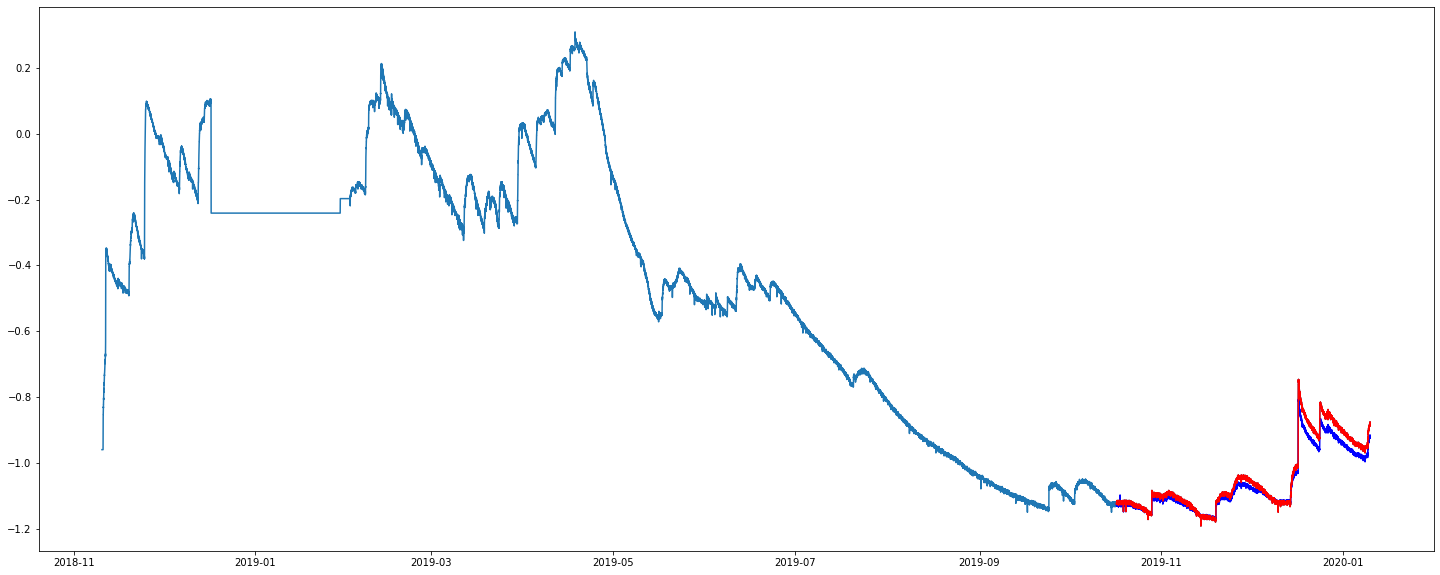

In [ ]:
plt.figure(figsize=(25,10))

plt.plot(dataset.index, dataset['gwl'])
plt.plot(df_result['date'], df_result['predicted'], 'b-', label = 'PRED')
plt.plot(df_result['date'], df_result['actual'], 'r-', label = 'ACT')

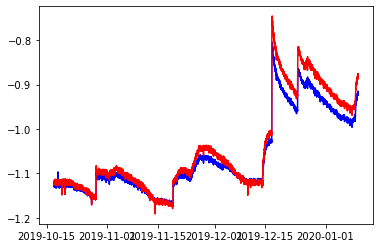

In [ ]:
plt.plot(df_result['date'], df_result['predicted'], 'b-', label = 'PRED')
plt.plot(df_result['date'], df_result['actual'], 'r-', label = 'ACT')

In [ ]:
df_result

,date,actual,predicted
0,2019-10-16 23:50:00,-1.122,-1.124062
1,2019-10-17 00:00:00,-1.125,-1.124062
2,2019-10-17 00:10:00,-1.122,-1.126592
3,2019-10-17 00:20:00,-1.122,-1.124062
4,2019-10-17 00:30:00,-1.118,-1.124062
...,...,...,...
12253,2020-01-10 02:00:00,-0.876,-0.873169
12254,2020-01-10 02:10:00,-0.886,-0.871418
12255,2020-01-10 02:20:00,-0.881,-0.880165
12256,2020-01-10 02:30:00,-0.878,-0.875794


In [ ]:
history

In [ ]:
import tensorflow as tf

In [ ]:
epoch = [25, 50]
unit_1 = [10, 30, 50]
# dropout_1 = [0.2, 0.4, 0.6]
# unit_2 = [10, 30, 50]
# dropout_2 = [0.2, 0.4, 0.6]
dense = [100, 300, 500]

min_gwl_df = df['gwl'].min()
max_gwl_df = df['gwl'].max()

In [ ]:
for a in epoch:
  for b in unit_1:
  # for c in dropout_1:
    for d in dense:
      # for e in unit_2:
      # for f in dropout_2:
      model1 = Sequential()
      # model.add(LSTM(b, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
      # model.add(Dropout(c))
      # model.add(Dense(d, activation='relu'))
      # model.add(LSTM(e, return_sequences=False))
      # model.add(Dropout(f))
      # model.add(Dense(1))
      # model.compile(optimizer='adam', loss='mean_squared_error',
      #               metrics=['mse', 'mae', 'mape'])
      history = model1.add(LSTM(b, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
      model1.add(Dense(d))
      # model.add(LSTM(10, return_sequences=False))
      # model.add(Dropout(0.2))
      # model.add(Dense(100))
      model1.compile(optimizer='adam', loss='mae')


      model1.fit(train_X, train_y, epochs=a, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

      model_name = "SAVE_MODEL/" + "model_" + str(a) + "_" + str(b) + "_" + str(d) + ".h5"
      model1.save("%s" % str(model_name))

      ypred = model.predict(test_X)
      inv_ypred = ypred.flatten()*(max_gwl_df - min_gwl_df) + min_gwl_df

      inv_yact = test_y*(max_gwl_df - min_gwl_df) + min_gwl_df

      rmse = sqrt(mean_squared_error(inv_yact, inv_ypred))
      rsquare = r2_score(inv_yact, inv_ypred)
      mae = mean_absolute_error(inv_yact, inv_ypred)

      df= pd.DataFrame({"model_name": str(model_name),
      "rmse": rmse,
      "rsquare": rsquare,
      "mae": mae}, index=[0])

      result = result.append(df, ignore_index=True)

      tf.keras.backend.clear_session()

Epoch 1/25


ValueError: ignored

In [ ]:
for a in [10, 25, 50]:
    model1 = Sequential()
    history = model1.add(LSTM(b, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
    model1.add(Dense(d))

    model1.compile(optimizer='adam', loss='mae')


    model1.fit(train_X, train_y, epochs=a, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

    model_name = "SAVE_MODEL/" + "model_" + str(a) + "_" + str(b) + "_" + str(d) + ".h5"
    model1.save("%s" % str(model_name))

    ypred = model.predict(test_X)
    inv_ypred = ypred.flatten()*(max_gwl_df - min_gwl_df) + min_gwl_df

    inv_yact = test_y*(max_gwl_df - min_gwl_df) + min_gwl_df

    rmse = sqrt(mean_squared_error(inv_yact, inv_ypred))
    rsquare = r2_score(inv_yact, inv_ypred)
    mae = mean_absolute_error(inv_yact, inv_ypred)

    df= pd.DataFrame({"model_name": str(model_name),
    "rmse": rmse,
    "rsquare": rsquare,
    "mae": mae}, index=[0])

    result = result.append(df, ignore_index=True)

    tf.keras.backend.clear_session()